# Proyecto energía analisis bivariado

## Integrantes

- Enrique Laguna Diaz
- Hector Aaron Ramirez Obregon
- Humberto Peñuelas Almeida

## Imports

In [84]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Importar datos del nuevo csv con datos limpios


In [85]:
path = "../DataSets/Clean_Energy.csv"
energia_df = pd.read_csv(path,sep=",",encoding="utf-8")
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [86]:
energia_df


,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0000
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0000
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0000
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0000
4,2001,1,AK,Total Electric Power Industry,Wind,87.0000
...,...,...,...,...,...,...
496769,2022,5,WY,"Electric Generators, Electric Utilities",Coal,2071403.0000
496770,2022,5,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0000
496771,2022,5,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0000
496772,2022,5,WY,"Electric Generators, Electric Utilities",Petroleum,1812.0000


In [87]:
energia_fuente = energia_df['ENERGY SOURCE'].unique()
energia_fuente


array(['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Total', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic', 'Pumped Storage', 'Geothermal'],
      dtype=object)

In [88]:
from matplotlib.pyplot import axis


SATE_GENERATION_DF = energia_df.groupby(by=['STATE'])['GENERATION'].sum().sort_values()


SATE_GENERATION_DF

STATE
DC             10167309.1600
VT            419077872.0700
AK            556603049.4000
DE            587067079.2200
RI            613878810.3300
SD            883936118.2900
HI            901465130.6000
ID           1211589308.2800
ME           1289787884.7900
NH           1695082187.7700
MT           2361308454.8500
NM           2987952138.3400
NE           2993842970.8700
CT           2994236611.4400
ND           3059918986.2000
MA           3081018016.3400
NV           3134808852.8700
UT           3450059423.0800
MD           3694048649.7100
WY           3951874239.0900
KS           4161406486.9200
CO           4451067501.0400
IA           4585295630.7800
MS           4659174830.2200
MN           4721860520.3100
OR           4878830685.4700
AR           4893653295.3600
WI           5376099859.4400
NJ           5567687466.2600
OK           6256690316.1600
WV           6772590295.4500
VA           6932382494.9700
TN           7331871730.0800
MO           7358832769.0300
KY      

In [89]:
energyYear2020 = energia_df.loc[(energia_df['ENERGY SOURCE'] == 'Coal') &(energia_df['YEAR'] == 2001)]

energyYear2020[['GENERATION']].sum()
#print(energyYear2020)

energy_sources = ['Coal', 'Petroleum', 'Natural Gas', 'Hydroelectric Conventional',
       'Wind', 'Other Gases', 'Nuclear',
       'Wood and Wood Derived Fuels', 'Other Biomass', 'Other',
       'Solar Thermal and Photovoltaic','Geothermal']


years = [2001+i for i in range(22)]
#years

acumulados = pd.DataFrame(columns = ['Año','Fuente','Total'])

# para cado año se van a calcular la producion total de cada fuente de energía
for i in years:

       for j in energy_sources:
              # se crea un data frame temporal filtrado por fuente de energia y año
              # a nuestro data frame de acumulados se le va a agregar una fila que contenga  añ, fuente, acumulado
              temp = energia_df.loc[(energia_df['ENERGY SOURCE'] == j) &(energia_df['YEAR'] == i)]
              acumulados.loc[len(acumulados.index)] = [i,j,temp['GENERATION'].sum()]

acumulados




GENERATION   7615823762.0000
dtype: float64

,Año,Fuente,Total
0,2001,Coal,7615823762.0000
1,2001,Petroleum,499520890.0000
2,2001,Natural Gas,2556516466.0000
3,2001,Hydroelectric Conventional,867844194.0000
4,2001,Wind,26949326.0000
...,...,...,...
259,2022,Wood and Wood Derived Fuels,59614386.0000
260,2022,Other Biomass,28314804.0000
261,2022,Other,19024844.0000
262,2022,Solar Thermal and Photovoltaic,230928908.0000


In [90]:
columnas = ['Año'] + energy_sources

acumulados = pd.DataFrame(columns = columnas)
acumulados_relativos = pd.DataFrame(columns = columnas)

for i in years:
    
    temp = energia_df.loc[(energia_df['YEAR'] == i)]
    lista = [str(i)]
    lista2 = [str(i)]



    for j in energy_sources:
        #Este ciclo acumula la energia producida segun la fuente de energiapara cada año
        

        temp2 = temp.loc[(temp['ENERGY SOURCE'] == j)]
        lista.append(temp2['GENERATION'].sum())
  
    #Suma de toda la energia producida por año'''    
    suma = sum(lista[1:len(lista)])

    for k in lista[1:]:
        
        #Se añade a la segunda lista la división de cada dato entre la suma total para obtener porcentajes
        
        lista2.append(float(k/suma))
    
    acumulados.loc[len(acumulados.index)] = lista
    acumulados_relativos.loc[len(acumulados_relativos.index)] = lista2



acumulados = acumulados.set_index('Año')
acumulados_relativos = acumulados_relativos.set_index('Año')

acumulados
acumulados_relativos

# Quitar notacion cientifica



,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Geothermal
Año,,,,,,,,,,,,
2001,7615823762.0000,499520890.0000,2556516466.0000,867844194.0000,26949326.0000,36157892.0000,3075305232.0000,140799620.0000,58192597.0000,47625387.0000,2171020.0000,54962004.0000
2002,7732521398.0000,378269561.0000,2764023006.0000,1057315311.0000,41417114.0000,45850741.0000,3120256348.0000,154660150.0000,60174860.0000,54107645.0000,2219324.0000,57965243.0000
2003,7894946990.0000,477622559.0000,2599630175.0000,1103225292.0000,44749874.0000,62400086.0000,3054930780.0000,150116400.0000,63248009.0000,56178049.0000,2136004.0000,57696920.0000
2004,7913202205.0000,484580260.0000,2840400089.0000,1073669264.0000,56574977.0000,61009705.0000,3154113548.0000,152467517.0000,61682301.0000,56929637.0000,2300628.0000,59243898.0000
2005,8051492196.0000,488900060.0000,3043841037.0000,1081285032.0000,71242207.0000,53856592.0000,3127945460.0000,155425656.0000,61681589.0000,51284219.0000,2201173.0000,58766978.0000
2006,7962044547.0000,256665653.0000,3265763085.0000,1156985655.0000,106356558.0000,56707221.0000,3148874544.0000,155048385.0000,64394129.0000,51897603.0000,2030816.0000,58272114.0000
2007,8065822339.0000,262955883.0000,3586359174.0000,990039886.0000,137799710.0000,53813418.0000,3225699012.0000,156056124.0000,66098215.0000,48924540.0000,2447170.0000,58548852.0000
2008,7943204995.0000,184970447.0000,3531922444.0000,1019325580.0000,221452399.0000,46827494.0000,3224833740.0000,149199420.0000,70935046.0000,47214652.0000,3457256.0000,59359904.0000
2009,7023617020.0000,155746055.0000,3683914737.0000,1093780375.0000,295544543.0000,42528438.0000,3195418340.0000,144200561.0000,73770406.0000,47713342.0000,3564716.0000,60034634.0000


,Coal,Petroleum,Natural Gas,Hydroelectric Conventional,Wind,Other Gases,Nuclear,Wood and Wood Derived Fuels,Other Biomass,Other,Solar Thermal and Photovoltaic,Geothermal
Año,,,,,,,,,,,,
2001,0.5083,0.0333,0.1706,0.0579,0.0018,0.0024,0.2053,0.0094,0.0039,0.0032,0.0001,0.0037
2002,0.4999,0.0245,0.1787,0.0684,0.0027,0.0030,0.2017,0.0100,0.0039,0.0035,0.0001,0.0037
2003,0.5072,0.0307,0.1670,0.0709,0.0029,0.0040,0.1962,0.0096,0.0041,0.0036,0.0001,0.0037
2004,0.4972,0.0304,0.1785,0.0675,0.0036,0.0038,0.1982,0.0096,0.0039,0.0036,0.0001,0.0037
2005,0.4955,0.0301,0.1873,0.0665,0.0044,0.0033,0.1925,0.0096,0.0038,0.0032,0.0001,0.0036
2006,0.4889,0.0158,0.2005,0.0710,0.0065,0.0035,0.1934,0.0095,0.0040,0.0032,0.0001,0.0036
2007,0.4843,0.0158,0.2153,0.0594,0.0083,0.0032,0.1937,0.0094,0.0040,0.0029,0.0001,0.0035
2008,0.4813,0.0112,0.2140,0.0618,0.0134,0.0028,0.1954,0.0090,0.0043,0.0029,0.0002,0.0036
2009,0.4440,0.0098,0.2329,0.0691,0.0187,0.0027,0.2020,0.0091,0.0047,0.0030,0.0002,0.0038


## Correccion 5
Cambiar la forma en la que se consigue la informacion necesaria


In [91]:
something = energia_df.pivot_table(values="GENERATION", index=['YEAR'], columns=['ENERGY SOURCE'], aggfunc='sum')
something = something.drop(labels=["Pumped Storage", "Total"], axis=1)
something

ENERGY SOURCE,Coal,Geothermal,Hydroelectric Conventional,Natural Gas,Nuclear,Other,Other Biomass,Other Gases,Petroleum,Solar Thermal and Photovoltaic,Wind,Wood and Wood Derived Fuels
YEAR,,,,,,,,,,,,
2001,7615823762.0000,54962004.0000,867844194.0000,2556516466.0000,3075305232.0000,47625387.0000,58192597.0000,36157892.0000,499520890.0000,2171020.0000,26949326.0000,140799620.0000
2002,7732521398.0000,57965243.0000,1057315311.0000,2764023006.0000,3120256348.0000,54107645.0000,60174860.0000,45850741.0000,378269561.0000,2219324.0000,41417114.0000,154660150.0000
2003,7894946990.0000,57696920.0000,1103225292.0000,2599630175.0000,3054930780.0000,56178049.0000,63248009.0000,62400086.0000,477622559.0000,2136004.0000,44749874.0000,150116400.0000
2004,7913202205.0000,59243898.0000,1073669264.0000,2840400089.0000,3154113548.0000,56929637.0000,61682301.0000,61009705.0000,484580260.0000,2300628.0000,56574977.0000,152467517.0000
2005,8051492196.0000,58766978.0000,1081285032.0000,3043841037.0000,3127945460.0000,51284219.0000,61681589.0000,53856592.0000,488900060.0000,2201173.0000,71242207.0000,155425656.0000
2006,7962044547.0000,58272114.0000,1156985655.0000,3265763085.0000,3148874544.0000,51897603.0000,64394129.0000,56707221.0000,256665653.0000,2030816.0000,106356558.0000,155048385.0000
2007,8065822339.0000,58548852.0000,990039886.0000,3586359174.0000,3225699012.0000,48924540.0000,66098215.0000,53813418.0000,262955883.0000,2447170.0000,137799710.0000,156056124.0000
2008,7943204995.0000,59359904.0000,1019325580.0000,3531922444.0000,3224833740.0000,47214652.0000,70935046.0000,46827494.0000,184970447.0000,3457256.0000,221452399.0000,149199420.0000
2009,7023617020.0000,60034634.0000,1093780375.0000,3683914737.0000,3195418340.0000,47713342.0000,73770406.0000,42528438.0000,155746055.0000,3564716.0000,295544543.0000,144200561.0000


<AxesSubplot:xlabel='YEAR'>

Text(0.5, 1.0, 'Energia producida por fuente dataframe')

Text(0.5, 0, 'Año')

Text(0, 0.5, 'Energia Producida')

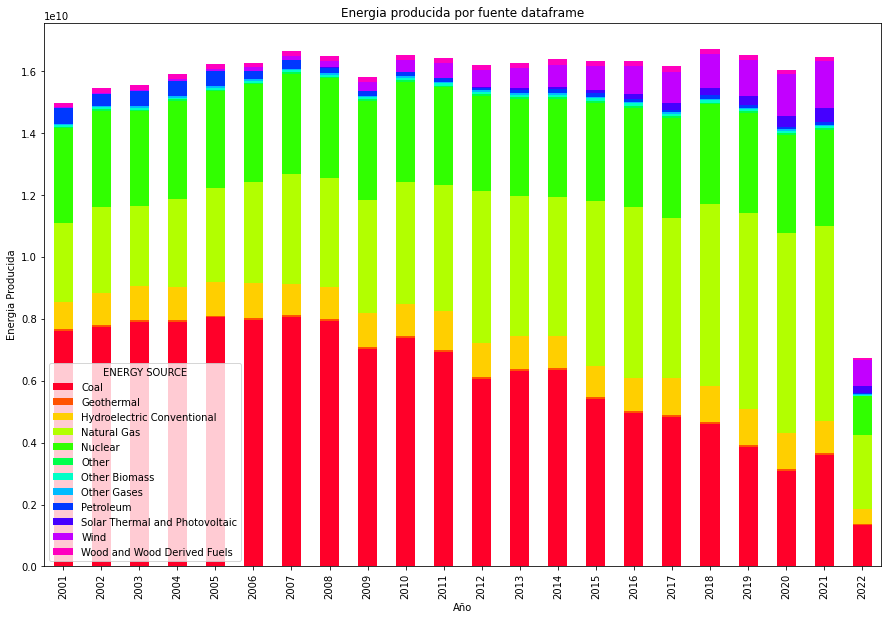

In [92]:
# Choose columns in the order to "stack" them
from operator import index

something.plot(
    kind="bar",
    stacked=True,
    figsize=(15,10),
    colormap = "gist_rainbow"
    )
    
plt.title("Energia producida por fuente dataframe")
plt.xlabel("Año")
plt.ylabel("Energia Producida")

#acumulados.plot(
##    kind="bar",
 #   stacked=True,
 #   figsize=(15,10),
    
  #  )
    
#plt.title("Energia producida por fuente")
#plt.xlabel("Año")
#plt.ylabel("Energia Producida")



#plt.setp(lines, color='r', linewidth=2.0)



<AxesSubplot:xlabel='Año'>

Text(0.5, 1.0, 'Energia producida por fuente')

Text(0.5, 0, 'Año')

Text(0, 0.5, 'Energia Producida')

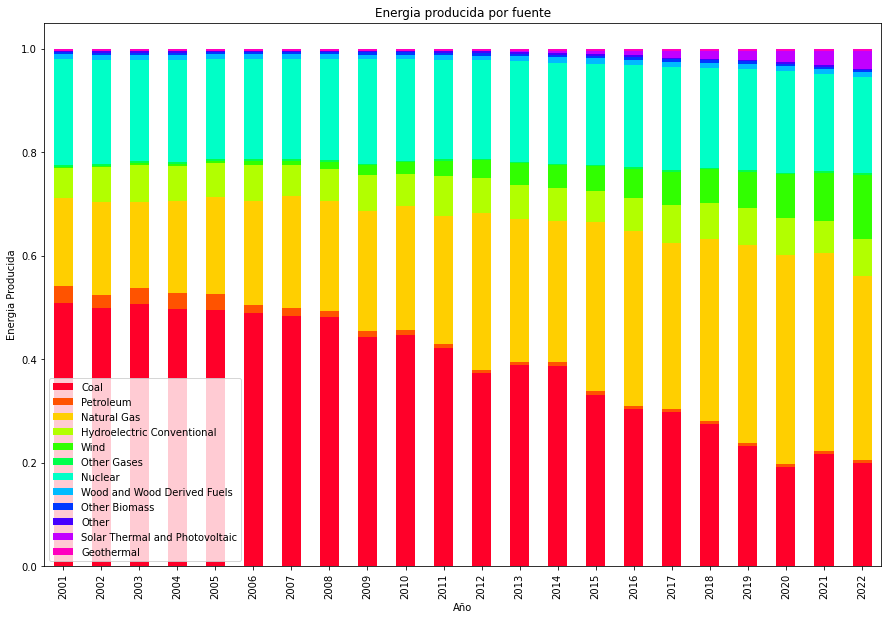

In [93]:
acumulados_relativos.plot(
    kind="bar",
    stacked=True,
    figsize=(15,10),
    colormap = "gist_rainbow"
    )
    
plt.title("Energia producida por fuente")
plt.xlabel("Año")
plt.ylabel("Energia Producida")


pandas.core.series.Series

LabelEncoder()

<AxesSubplot:xlabel='y'>

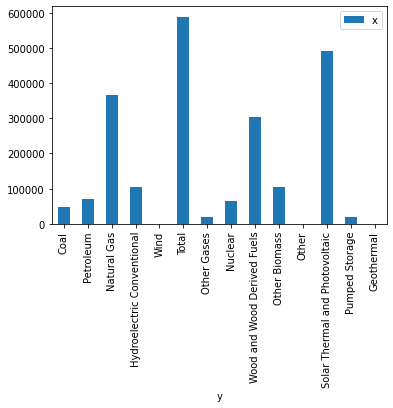

In [94]:
generation_source = energia_df['GENERATION']
# generation_source
type(generation_source)
TEPI = energia_df.loc[energia_df['GENERATION'] == 'Total Electric Power Industry']

# tranformar variables no numericas a numericas
le = preprocessing.LabelEncoder()
le.fit(generation_source)

# list(le.classes_)

numeric_generation_source = le.transform(generation_source)
#np.sort(numeric_generation_source)

energy_sr = energia_df['ENERGY SOURCE'].unique()
# energy_sr

count_producers = energia_df['ENERGY SOURCE'].value_counts()
num_producers = count_producers.values
#np.sort(num_producers)

df = pd.DataFrame({'x':generation_source[:14], 'y': energy_sr[:14]})
#df.sort_values(by=['x', 'y'])
df.plot('y','x', kind='bar')


## Relaciones entre variables


### Energia total generada (GENERATION) por tipo de productor (TYPE OF PRODUCER)

In [95]:

tipoDeProductor = energia_df.rename(columns={"TYPE OF PRODUCER": "tipoProductor"})
arrTipoProductor = tipoDeProductor.tipoProductor.unique()

# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
tipoDeProductor.drop(['YEAR', 'MONTH', 'STATE', 'ENERGY SOURCE'], axis=1)

# dict para crear el dataframe
d={"tipoProductor":[], "generacion":[]}

for productor in arrTipoProductor:
    ## Obtener las filas que tengan el Total Electric Power industry
    typeProducerAll = tipoDeProductor.loc[(tipoDeProductor["tipoProductor"] == productor)]

    totalGeneracion = typeProducerAll[['GENERATION']].sum()

    d["tipoProductor"].append(productor)
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneracionProductores = pd.DataFrame(data=d)
TotalGeneracionProductores


,tipoProductor,GENERATION
0,Total Electric Power Industry,46903.0000
1,Total Electric Power Industry,71085.0000
2,Total Electric Power Industry,367521.0000
3,Total Electric Power Industry,104549.0000
4,Total Electric Power Industry,87.0000
...,...,...
496769,"Electric Generators, Electric Utilities",2071403.0000
496770,"Electric Generators, Electric Utilities",96790.0000
496771,"Electric Generators, Electric Utilities",91570.0000
496772,"Electric Generators, Electric Utilities",1812.0000


,tipoProductor,generacion
0,Total Electric Power Industry,346098425989.8400
1,"Electric Generators, Electric Utilities",205014849555.7400
2,"Combined Heat and Power, Electric Power",13733195268.7100
3,"Combined Heat and Power, Commercial Power",894557080.5600
4,"Combined Heat and Power, Industrial Power",12451305577.0100
5,"Electric Generators, Independent Power Producers",114004518964.5900


### Analisis Bivariado de TYPE OF PRODUCER y GENERATION

<AxesSubplot:title={'center':'Energia total producida por tipo de productor'}, xlabel='tipoProductor'>

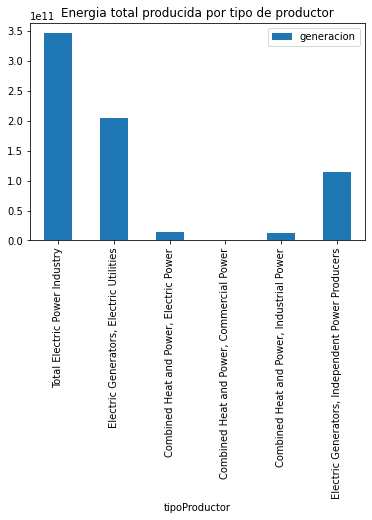

In [96]:
TotalGeneracionProductores.plot(x='tipoProductor', y="generacion", kind='bar', title="Energia total producida por tipo de productor")

### Energia total producida por mes (MONTH)

In [97]:
# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
energiaProducidaPorMes = energia_df.drop(['YEAR', 'STATE', 'ENERGY SOURCE', 'TYPE OF PRODUCER'], axis=1)

# dict para nombre de los meses
mesD = {
    1:"Enero", 2:"Febrero", 3:"Mazro", 4:"Abril", 5:"Mayo", 6:"Junio", 7:"Julio", 8:"Agosto", 9:"Septiembre", 10:"Octubre", 11:"Noviembre", 12:"Diciembre"
}

# dict para crear el dataframe
d={"mes":[], "generacion":[]}

for mes in range(1, 13):
    ## Obtener las filas que tengan el Total Electric Power industry
    mesTotal = energiaProducidaPorMes.loc[(tipoDeProductor["MONTH"] == mes)]

    totalGeneracion = mesTotal[['GENERATION']].sum()
    d["mes"].append(mesD[mes])
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneradoPorMes = pd.DataFrame(data=d)
TotalGeneradoPorMes

,mes,generacion
0,Enero,61889240658.4100
1,Febrero,54753691292.8500
2,Mazro,55596815532.1700
3,Abril,51750246326.1900
4,Mayo,56708893372.7600
5,Junio,60099932947.8700
6,Julio,66783869172.5700
7,Agosto,66306297521.8500
8,Septiembre,57080726268.1300
9,Octubre,52776048096.5600


<AxesSubplot:xlabel='mes'>

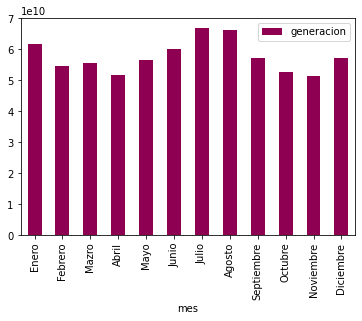

In [104]:
TotalGeneradoPorMes.plot(x="mes",kind="bar", colormap="PiYG")


### Energia total generada por Año

In [99]:
# print(arrTipoProductor)

# ## Eliminar todas las demas columnas que no me sirvan.
energiaProducidaPorYear = energia_df.drop(['MONTH', 'STATE', 'ENERGY SOURCE', 'TYPE OF PRODUCER'], axis=1)

# dict para crear el dataframe
d={"year":[], "generacion":[]}

for year in range(2001, 2023):
    ## Obtener las filas que tengan el Total Electric Power industry
    yearTotal = energiaProducidaPorYear.loc[(tipoDeProductor["YEAR"] == year)]

    totalGeneracion = yearTotal[['GENERATION']].sum()
    d["year"].append(year)
    d["generacion"].append(totalGeneracion[0])
    
TotalGeneradoPorYear = pd.DataFrame(data=d)
TotalGeneradoPorYear

,year,generacion
0,2001,29893149208.0000
1,2002,30867622077.0000
2,2003,31065481683.0000
3,2004,31764442233.0000
4,2005,32443382056.0000
5,2006,32517617855.0000
6,2007,33253957836.0000
7,2008,32955102159.0000
8,2009,31602647486.0000
9,2010,33000479260.0000


<AxesSubplot:xlabel='year'>

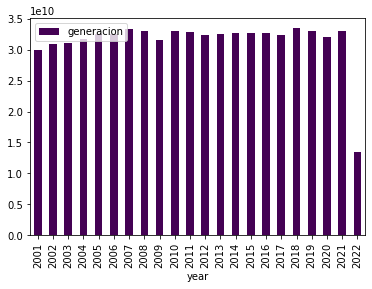

In [100]:
TotalGeneradoPorYear.plot(x="year",kind="bar", colormap="viridis")

### Tipo de productor x Fuente de energia

In [101]:
dataForTheHeatmap = energia_df.filter(items=['TYPE OF PRODUCER', 'ENERGY SOURCE'])
dataForTheHeatmap.rename(columns={"TYPE OF PRODUCER":"tp", "ENERGY SOURCE":"es"})

## arreglo con los nombres unicos de tipo de productor y tipo de energia
arrgFuenteEnergia = dataForTheHeatmap["ENERGY SOURCE"].unique()

d = dataForTheHeatmap['ENERGY SOURCE'].value_counts()

dTipoProductorXEnergia = {}

for productor in arrTipoProductor:

    dTipoProductorXEnergia[productor] = []

    for energia in arrgFuenteEnergia:

        # obtener la interseccion entre tipo de procuctor y fuente de energia
        totalEnergy = dataForTheHeatmap.loc[(dataForTheHeatmap["TYPE OF PRODUCER"] == productor) & (dataForTheHeatmap["ENERGY SOURCE"] == energia) if not None else 1]
        if(totalEnergy.empty):
            dTipoProductorXEnergia[productor].append(0)
        else:
            t = totalEnergy.value_counts()
            dTipoProductorXEnergia[productor].append(t[0])
        
dfTipoProductorXenergia = pd.DataFrame(data=dTipoProductorXEnergia)


# # Crear un nuevo datafram con los tipos de productores en columnas y fuente de energia en las filas
# df = pd.DataFrame(columns=dataForTheHeatmap['TYPE OF PRODUCER'].unique(), index=dataForTheHeatmap['ENERGY SOURCE'].unique())
# df



,tp,es
0,Total Electric Power Industry,Coal
1,Total Electric Power Industry,Petroleum
2,Total Electric Power Industry,Natural Gas
3,Total Electric Power Industry,Hydroelectric Conventional
4,Total Electric Power Industry,Wind
...,...,...
496769,"Electric Generators, Electric Utilities",Coal
496770,"Electric Generators, Electric Utilities",Hydroelectric Conventional
496771,"Electric Generators, Electric Utilities",Natural Gas
496772,"Electric Generators, Electric Utilities",Petroleum


<AxesSubplot:>

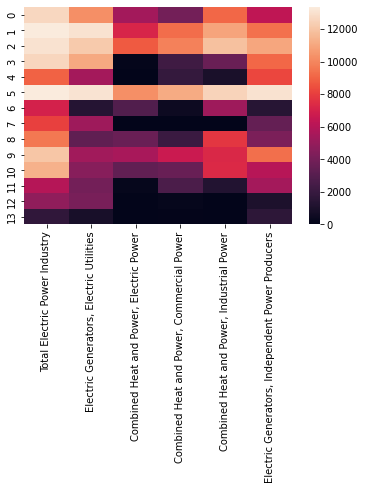

In [102]:
sns.heatmap(dfTipoProductorXenergia)

### Tipo de productor x Years

,Total Electric Power Industry,"Electric Generators, Electric Utilities","Combined Heat and Power, Electric Power","Combined Heat and Power, Commercial Power","Combined Heat and Power, Industrial Power","Electric Generators, Independent Power Producers"
2001,5522,3932,2170,2087,3320,3181
2002,5687,4036,2367,2118,3400,3395
2003,5780,4115,2207,2100,3504,3498
2004,5856,4088,2280,2208,3528,3556
2005,5892,4068,2304,2172,3576,3576
2006,5916,4076,2304,2124,3580,3695
2007,5951,4132,2279,2255,3552,3693
2008,6188,4193,2292,2161,3619,3913
2009,6200,4196,2352,2246,3576,3968
2010,6307,4290,2310,2276,3636,4188


<AxesSubplot:>

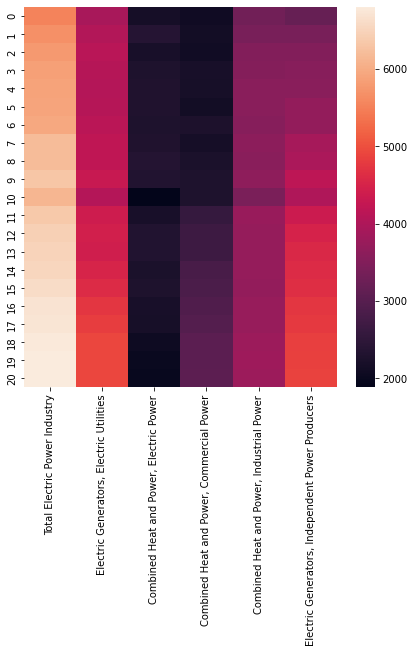

In [103]:
dataForTheHeatmap2= energia_df.filter(items=['TYPE OF PRODUCER', 'YEAR'])

dTipoProductorXYear = {}

for productor in arrTipoProductor:

    dTipoProductorXYear[productor] = []

    for year in range(2001, 2022):

        # obtener la interseccion entre tipo de procuctor y fuente de energia
        totalEnergy = dataForTheHeatmap2.loc[(dataForTheHeatmap2["TYPE OF PRODUCER"] == productor) & (dataForTheHeatmap2["YEAR"] == year) if not None else 1]
        if(totalEnergy.empty):
            dTipoProductorXYear[productor].append(0)
        else:
            t = totalEnergy.value_counts()
            dTipoProductorXYear[productor].append(t[0])
        
dfTipoProductorXYearChido = pd.DataFrame(data=dTipoProductorXYear)
dfTipoProductorXYearChido.rename(index={key: key+2001 for key in range(0, 22)})

fig, ax = plt.subplots(figsize=(7,7))  
sns.heatmap(dfTipoProductorXYearChido)
